# Portfolio Creation

## Extract Stock Characteristics
- Using Yahoo Finance, extract the most relevant accounts for ratio analysis
    - Ratios
    - Macro-ratios (profitability, liquidity, leverage, efficiency, market value)
- Using okama, extract (5 year, 1, year, 3 month, 1 month, 1 week, 1 day)
    - volatility (standard deviation)
    - returns (mean returns)
- Possible later additions:
    - Macroeconomic indicators
    - Industry indicators
    - Sentiment indicators

### Single Stock Analysis
We will start by looking at just one stock to develop a process for extracting and analyzing the data.

In [1]:
import pandas as pd
import yfinance as yf
import okama as ok

# Fetch the balance sheet for a stock (e.g., Google)
tick = "AAPL"

ticker = yf.Ticker(tick)
balance_sheet = ticker.balance_sheet
income_stmt = ticker.income_stmt
cash_flow = ticker.cashflow
income_stmt.rename(columns={"" : "Account"})

stock = ok.Asset(tick + ".US")

In [2]:
income_stmt

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.241,0.147,0.162,0.133,NaN
Normalized EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
Reconciled Depreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
Reconciled Cost Of Revenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
Net Interest Income,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
Interest Expense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


#### Extract Ratios

In [3]:
# Profitability
net_income = income_stmt.loc["Net Income", "2024"].iloc[0]
revenue = income_stmt.loc["Total Revenue", "2024"].iloc[0]
net_profit_margin = net_income / revenue

cogs = income_stmt.loc["Cost Of Revenue", "2024"].iloc[0]
gross_profit_margin = (revenue - cogs) / revenue

total_assets = balance_sheet.loc["Total Assets", "2024"].iloc[0]
roa = net_income / total_assets

stockholders_equity = balance_sheet.loc["Stockholders Equity", "2024"].iloc[0]
roe = net_income / stockholders_equity

# Liquidity
current_assets = balance_sheet.loc["Current Assets", "2024"].iloc[0]
current_liabilities = balance_sheet.loc["Current Liabilities", "2024"].iloc[0]
current_ratio = current_assets / current_liabilities

inventory = balance_sheet.loc["Inventory", "2024"].iloc[0]
quick_ratio = (current_assets - inventory) / current_liabilities

cash_and_cash_equivalents = balance_sheet.loc["Cash And Cash Equivalents", "2024"].iloc[0]
cash_ratio = cash_and_cash_equivalents / current_liabilities

# Efficiency
inventory_2023 = balance_sheet.loc["Inventory", "2023"].iloc[0]
average_inventory = (inventory + inventory_2023) / 2
inventory_turnover = cogs / average_inventory

average_accounts_receivable = (balance_sheet.loc["Accounts Receivable", "2024"].iloc[0] + balance_sheet.loc["Accounts Receivable", "2023"].iloc[0]) / 2
accounts_receivable_turnover = revenue / average_accounts_receivable

asset_turnover = revenue / total_assets

# Market Value
market_price_per_share = stock.adj_close[-1]
diluted_earnings_per_share = income_stmt.loc["Diluted EPS", "2024"].iloc[0]
pe_ratio = market_price_per_share / diluted_earnings_per_share

book_value_per_share = stockholders_equity / ticker.info['sharesOutstanding']
pb_ratio = market_price_per_share / book_value_per_share

dividends_paid = cash_flow.loc["Cash Dividends Paid", "2024"].iloc[0] # Not all companies pay dividends
dividends_per_share = dividends_paid / ticker.info['sharesOutstanding']
dividend_yield = dividends_per_share / market_price_per_share

# Leverage
total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest", "2024"].iloc[0]
debt_to_equity = total_liabilities / stockholders_equity

debt_ratio = total_liabilities / total_assets

ebit = income_stmt.loc["EBIT", "2024"].iloc[0]
interest_expense = income_stmt.loc["Interest Expense", "2024"].iloc[0]
interest_coverage_ratio = ebit / interest_expense

/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_37222/1110401214.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


## Multi-stock Analysis

Stratified samples from different sectors: High risk low risk within each sector, consider ESG scores
- First, let's find stratified samples from different sectors


In [4]:
import pandas as pd

# Define the universe of 50 tickers split among 11 sectors.
# For 6 sectors, we'll include 5 tickers each, and for the remaining 5 sectors, 4 tickers each.
stock_sample = {
    'Ticker': [
        # Technology (5)
        'AAPL', 'MSFT', 'NVDA', 'INTC', 'IBM',
        # Healthcare (5)
        'JNJ', 'PFE', 'MRNA', 'UNH', 'ABBV',
        # Financials (5)
        'JPM', 'BAC', 'GS', 'WFC', 'C',
        # Consumer Discretionary (5)
        'HD', 'MCD', 'TSLA', 'AMZN', 'NKE',
        # Consumer Staples (5)
        'PG', 'KO', 'WMT', 'COST', 'PEP',
        # Energy (5)
        'XOM', 'CVX', 'SLB', 'EOG', 'OXY',
        # Industrials (4)
        'CAT', 'BA', 'DE', 'HON',
        # Utilities (4)
        'DUK', 'SO', 'AEP', 'EXC',
        # Materials (4)
        'DOW', 'FCX', 'LIN', 'NEM',
        # Communication Services (4)
        'DIS', 'NFLX', 'T', 'VZ',
        # Real Estate (4)
        'O', 'PLD', 'SPG', 'AMT'
    ],
    'Sector': [
        # Technology
        'Technology', 'Technology', 'Technology', 'Technology', 'Technology',
        # Healthcare
        'Healthcare', 'Healthcare', 'Healthcare', 'Healthcare', 'Healthcare',
        # Financials
        'Financials', 'Financials', 'Financials', 'Financials', 'Financials',
        # Consumer Discretionary
        'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary',
        # Consumer Staples
        'Consumer Staples', 'Consumer Staples', 'Consumer Staples', 'Consumer Staples', 'Consumer Staples',
        # Energy
        'Energy', 'Energy', 'Energy', 'Energy', 'Energy',
        # Industrials (4)
        'Industrials', 'Industrials', 'Industrials', 'Industrials',
        # Utilities (4)
        'Utilities', 'Utilities', 'Utilities', 'Utilities',
        # Materials (4)
        'Materials', 'Materials', 'Materials', 'Materials',
        # Communication Services (4)
        'Communication Services', 'Communication Services', 'Communication Services', 'Communication Services',
        # Real Estate (4)
        'Real Estate', 'Real Estate', 'Real Estate', 'Real Estate'
    ]
}

# Create the DataFrame
stocks = pd.DataFrame(stock_sample)
print("Full universe of 50 tickers:")
print(stocks.sample(5))

Full universe of 50 tickers:
   Ticker                  Sector
42    DIS  Communication Services
38    DOW               Materials
14      C              Financials
0    AAPL              Technology
35     SO               Utilities


In [5]:
import yfinance as yf

# Fetch the balance sheet for a stock (e.g., Google)

# Problem tickers: GS, BAC, JPM, C, WFC, NFLX, PLD, AMT, SPG, 

tick = "GS"

ticker = yf.Ticker(tick)
balance_sheet = ticker.balance_sheet
income_stmt = ticker.income_stmt
cash_flow = ticker.cashflow
# income_stmt.rename(columns={"" : "Account"})

In [6]:
import pandas as pd
from IPython.display import display

# Set display options
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Display the full DataFrame
display(income_stmt)

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-350451000.0,-146850000.0,-28600000.0,-868803590.031253
Tax Rate For Calcs,0.207,0.165,0.2,0.242007
Total Unusual Items,-1693000000.0,-890000000.0,-143000000.0,-3590000000.0
Total Unusual Items Excluding Goodwill,-1693000000.0,-890000000.0,-143000000.0,-3590000000.0
Net Income From Continuing Operation Net Minority Interest,8516000000.0,11261000000.0,21635000000.0,9459000000.0
Reconciled Depreciation,4856000000.0,2455000000.0,2015000000.0,1902000000.0
Net Interest Income,6351000000.0,7678000000.0,6470000000.0,4751000000.0
Interest Expense,62164000000.0,21346000000.0,5650000000.0,8938000000.0
Interest Income,68515000000.0,29024000000.0,12120000000.0,13689000000.0
Normalized Income,9858549000.0,12004150000.0,21749400000.0,12180196409.968746


In [7]:
import time
import pandas as pd
from ratios import compute_ratios
from concurrent.futures import ThreadPoolExecutor, as_completed

# Sample DataFrame with tickers (e.g., stocks_small)
# stocks_small = stocks.sample(5)

def process_ticker(row):
    ticker_symbol = row['Ticker']
    start_time = time.time()
    try:
        ratios = compute_ratios(ticker_symbol)
        elapsed = time.time() - start_time
        ratios['ticker'] = ticker_symbol
        ratios['elapsed'] = elapsed
        print(f"Processing {ticker_symbol}... Success in {elapsed:.2f} sec")
        return ratios, None
    except Exception as e:
        elapsed = time.time() - start_time
        print(f"Processing {ticker_symbol}... Failed in {elapsed:.2f} sec: {e}")
        return None, ticker_symbol

results = []
error_tickers = []

stocks_small = stocks.sample(5) # Use this for testing with a small sample

with ThreadPoolExecutor(max_workers=10) as executor:
    futures = {executor.submit(process_ticker, row): row['Ticker'] for idx, row in stocks.iterrows()}
    for future in as_completed(futures):
        res, error = future.result()
        if res is not None:
            results.append(res)
        if error:
            error_tickers.append(error)

# Build a summary DataFrame
if results:
    df_results = pd.DataFrame(results)
    print("\nComputed Ratios Summary (first 5 rows):")
    display(df_results.head())
else:
    print("No ratios computed successfully.")

if error_tickers:
    print("\nTickers with errors:")
    print(error_tickers)
else:
    print("\nAll tickers processed successfully.")

/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing AAPL... Success in 3.25 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing MRNA... Success in 5.03 sec
Processing NVDA... Success in 5.13 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing ABBV... Success in 6.32 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing PFE... Success in 8.15 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing UNH... Success in 9.19 sec
Processing MSFT... Success in 9.28 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing JNJ... Success in 11.37 sec
Processing INTC... Success in 11.42 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing IBM... Success in 12.67 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing BAC... Success in 8.88 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing GS... Success in 9.60 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing JPM... Success in 13.99 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing C... Success in 9.41 sec
Processing WFC... Success in 11.27 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing MCD... Success in 10.48 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing HD... Success in 10.84 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing TSLA... Success in 10.07 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing AMZN... Success in 10.39 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing NKE... Success in 12.03 sec
Processing KO... Success in 10.16 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing COST... Success in 8.13 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing PEP... Success in 10.04 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing PG... Success in 14.12 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing WMT... Success in 13.27 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing CVX... Success in 11.46 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing XOM... Success in 13.76 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing SLB... Success in 13.07 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing CAT... Success in 9.83 sec
Processing EOG... Success in 13.02 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing BA... Success in 12.03 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing OXY... Success in 13.53 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DE... Success in 12.31 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing HON... Success in 12.36 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DUK... Success in 11.26 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DOW... Success in 8.93 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing SO... Success in 12.63 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing FCX... Success in 9.79 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing AEP... Success in 12.18 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing EXC... Success in 13.43 sec
Processing LIN... Success in 10.41 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing NEM... Success in 11.60 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing DIS... Success in 11.92 sec
Processing NFLX... Success in 11.67 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing T... Success in 13.03 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing VZ... Success in 13.81 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing O... Success in 13.80 sec


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]
/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


Processing SPG... Success in 13.51 sec
Processing PLD... Success in 14.72 sec
Processing AMT... Success in 11.91 sec

Computed Ratios Summary (first 5 rows):


/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,dividend_yield,debt_to_equity,debt_ratio,interest_coverage_ratio,ticker,elapsed
0,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,39.210440,58.100474,-0.004161,4.673462,0.823741,29.062039,AAPL,3.249652
1,-0.697957,0.305153,-0.255834,-0.340263,3.424544,3.357546,0.964179,8.154648,5.932367,0.366547,-2.723439,0.935160,<NA>,0.330013,0.248128,-102.736842,MRNA,5.033655
2,0.161934,0.569289,0.106066,0.197638,3.515618,2.729544,0.51638,2.992787,6.364044,0.654995,754.482759,145.470669,-0.000124,0.863355,0.463333,16.958015,NVDA,5.128654
3,0.089528,0.624158,0.036100,0.469402,0.872123,0.763801,0.338627,5.317791,4.847874,0.403219,74.636029,34.593022,-0.029407,11.999421,0.922820,3.810252,ABBV,6.320749
4,0.036225,0.573407,0.009355,0.023805,0.906662,0.693476,0.059694,2.603443,5.286818,0.258259,71.405405,1.682004,-0.061761,1.541477,0.605794,1.47895,PFE,8.150533



All tickers processed successfully.


In [27]:
display(df_results)

,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,dividend_yield,debt_to_equity,debt_ratio,interest_coverage_ratio,ticker,elapsed
0,0.341462,0.689201,0.175644,0.350887,1.769167,1.745163,0.333215,21.103172,4.559812,0.514387,42.762397,14.921816,-0.006434,0.997721,0.499430,46.381606,MSFT,2.870230
1,0.060895,0.236357,0.081766,0.252163,0.791861,<NA>,0.256698,<NA>,18.868650,1.342733,21.418273,5.298819,-0.014376,1.969456,0.638612,9.968577,UNH,2.927490
2,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,39.946166,59.190644,-0.004085,4.673462,0.823741,29.062039,AAPL,3.331112
3,0.161934,0.569289,0.106066,0.197638,3.515618,2.729544,0.51638,2.992787,6.364044,0.654995,800.172414,154.280021,-0.000117,0.863355,0.463333,16.958015,NVDA,4.445269
4,0.031146,0.400365,0.008817,0.015996,1.542402,1.14576,0.252344,2.670691,14.393630,0.283069,64.300000,1.054717,-0.027728,0.772867,0.425986,1.867882,INTC,4.809196
5,0.121274,0.554478,0.055471,0.332934,0.964422,0.930397,0.382979,20.316992,8.994547,0.457406,32.471744,10.846410,-0.024713,4.998358,0.832795,6.407592,IBM,6.344196
6,-0.697957,0.305153,-0.255834,-0.340263,3.424544,3.357546,0.964179,8.154648,5.932367,0.366547,-2.911598,0.997182,<NA>,0.330013,0.248128,-102.736842,MRNA,7.354874
7,0.036225,0.573407,0.009355,0.023805,0.906662,0.693476,0.059694,2.603443,5.286818,0.258259,69.972973,1.648262,-0.063026,1.541477,0.605794,1.47895,PFE,9.280275
8,0.089528,0.624158,0.036100,0.469402,0.872123,0.763801,0.338627,5.317791,4.847874,0.403219,72.555147,33.628555,-0.03025,11.999421,0.922820,3.810252,ABBV,9.377186
9,0.412793,0.688195,0.209796,0.511138,1.155849,0.914265,0.4723,2.47592,5.890910,0.508236,11.508017,5.527367,-0.030962,1.436357,0.589551,20.510363,JNJ,11.740459


In [8]:
import yfinance as yf

# Fetch the balance sheet for a stock (e.g., Google)

# Problem tickers: GS, BAC, JPM, C, WFC, NFLX, PLD, AMT, SPG, 

tick = "GS"

ticker = yf.Ticker(tick)
balance_sheet = ticker.balance_sheet
income_stmt = ticker.income_stmt
cash_flow = ticker.cashflow
# income_stmt.rename(columns={"" : "Account"})

In [60]:
balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,599518678.0,582896393.0,572857062.0,557603316.0
Preferred Shares Number,91998000.0,159998000.0,159998000.0,266998000.0
Ordinary Shares Number,323376354.0,334918639.0,333573254.0,344088725.0
Share Issued,922895032.0,917815032.0,906430316.0,901692041.0
Net Debt,89439000000.0,80220000000.0,58555000000.0,136264000000.0
Total Debt,333248000000.0,324199000000.0,321879000000.0,294389000000.0
Tangible Book Value,98609000000.0,98103000000.0,94520000000.0,79767000000.0
Invested Capital,436718000000.0,428531000000.0,418814000000.0,376835000000.0
Net Tangible Assets,109812000000.0,108806000000.0,105223000000.0,90970000000.0
Capital Lease Obligations,2232000000.0,2154000000.0,2288000000.0,2283000000.0


In [50]:
from ratios import extract_value

extract_value(balance_sheet, "Current Assets", 2023)

<NA>

In [38]:
# List the NA ratios

df_results[df_results["ticker"] == "GS"]

,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,dividend_yield,debt_to_equity,debt_ratio,interest_coverage_ratio,ticker,elapsed
10,0.184114,<NA>,0.005188,0.072845,<NA>,<NA>,<NA>,<NA>,0.345253,0.028176,29.215129,1.783404,-0.020092,13.04212,0.928786,<NA>,GS,9.455427


In [40]:
# List the NA ratios for the ticker "GS"
na_columns = df_results[df_results["ticker"] == "GS"].isna().any()
na_columns = na_columns[na_columns].index.tolist()
na_columns

['gross_profit_margin',
 'current_ratio',
 'quick_ratio',
 'cash_ratio',
 'inventory_turnover',
 'interest_coverage_ratio']

In [1]:
from ratios import compute_ratios

compute_ratios("AAPL")

/Users/adene/Documents/School/Carroll_2024-25/SeniorProject-PortfolioManagement/src/ratios.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price_per_share = stock.adj_close[-1]


{'net_profit_margin': 0.2530623426432028,
 'gross_profit_margin': 0.4413112957720756,
 'roa': 0.27509834563776475,
 'roe': 1.5607601454639075,
 'current_ratio': 0.9880116717592975,
 'quick_ratio': 0.9444421504665951,
 'cash_ratio': 0.20621713876730807,
 'inventory_turnover': 37.977653631284916,
 'accounts_receivable_turnover': 13.287284198849061,
 'asset_turnover': 1.087077369016657,
 'pe_ratio': np.float64(39.21044045676999),
 'pb_ratio': np.float64(58.10047422799215),
 'dividend_yield': np.float64(-0.004161229060363006),
 'debt_to_equity': 4.673462491552152,
 'debt_ratio': 0.8237407929480435,
 'interest_coverage_ratio': 29.062039155860667}

## Build Portfolio

Idea:
- Put data into a custom object and save it for later use in caes yahoo finance isn't working or we want to start analyzing quickly. 


TODO: Select 2 portfolio forecasting methods

1. Diversification model (PCA -> KMeans or other clustering algorithm)
2. Build first portfolio construction model (choose sample from each cluster)
3. Alpha beta model

In [155]:
# Add alpha, beta, an industry column data
# Define a mapping from Ticker to Industry (for demonstration purposes)
industry_mapping = {
    'AAPL': 'Consumer Electronics',
    'MSFT': 'Software',
    'NVDA': 'Semiconductors',
    'INTC': 'Semiconductors',
    'IBM': 'IT Services',
    'JNJ': 'Pharmaceuticals',
    'PFE': 'Pharmaceuticals',
    'MRNA': 'Biotechnology',
    'UNH': 'Healthcare Services',
    'ABBV': 'Pharmaceuticals',
    'JPM': 'Banking',
    'BAC': 'Banking',
    'GS': 'Investment Banking',
    'WFC': 'Banking',
    'C': 'Banking',
    'HD': 'Home Improvement',
    'MCD': 'Restaurants',
    'TSLA': 'Automotive',
    'AMZN': 'E-commerce',
    'NKE': 'Apparel',
    'PG': 'Household Products',
    'KO': 'Beverages',
    'WMT': 'Retail',
    'COST': 'Retail',
    'PEP': 'Beverages',
    'XOM': 'Oil & Gas',
    'CVX': 'Oil & Gas',
    'SLB': 'Oilfield Services',
    'EOG': 'Oil & Gas',
    'OXY': 'Oil & Gas',
    'CAT': 'Heavy Equipment',
    'BA': 'Aerospace',
    'DE': 'Engineering',
    'HON': 'Conglomerate',
    'DUK': 'Utilities',
    'SO': 'Utilities',
    'AEP': 'Utilities',
    'EXC': 'Utilities',
    'DOW': 'Chemicals',
    'FCX': 'Mining',
    'LIN': 'Chemicals',
    'NEM': 'Mining',
    'DIS': 'Entertainment',
    'NFLX': 'Streaming',
    'T': 'Telecommunications',
    'VZ': 'Telecommunications',
    'O': 'Real Estate Investment Trust',
    'PLD': 'Real Estate Investment Trust',
    'SPG': 'Real Estate Investment Trust',
    'AMT': 'Real Estate Investment Trust'
}

# Add the Industry column by mapping the Ticker column using the industry_mapping dictionary
df_results['Industry'] = df_results['ticker'].map(industry_mapping)

print("Stocks dataframe with Industry column:")
print(df_results[["ticker", "Industry"]].head())

Stocks dataframe with Industry column:
  ticker              Industry
0   AAPL  Consumer Electronics
1   MRNA         Biotechnology
2   NVDA        Semiconductors
3   ABBV       Pharmaceuticals
4    PFE       Pharmaceuticals


In [164]:
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler

lower = -5
upper = 5

def zscore_with_zero(series):
    # Compute z-scores ignoring NaNs; returns a numpy array
    z = zscore(series, nan_policy='omit')
    z = np.clip(z, lower, upper)
    # Wrap in a Series (to retain the original index) and replace any NaNs with 0
    return pd.Series(z, index=series.index).fillna(0)

# Compute composite metrics using the zscore_with_zero function
profitability = (zscore_with_zero(df_results["net_profit_margin"]) +
                 zscore_with_zero(df_results["gross_profit_margin"]) +
                 zscore_with_zero(df_results["roa"]) +
                 zscore_with_zero(df_results["roe"]))

liquidity = (zscore_with_zero(df_results["current_ratio"]) +
             zscore_with_zero(df_results["quick_ratio"]) +
             zscore_with_zero(df_results["cash_ratio"]))

efficiency = (zscore_with_zero(df_results["inventory_turnover"]) +
              zscore_with_zero(df_results["accounts_receivable_turnover"]) +
              zscore_with_zero(df_results["asset_turnover"]))

market_value = (zscore_with_zero(df_results["pe_ratio"]) +
                zscore_with_zero(df_results["pb_ratio"]) +
                zscore_with_zero(df_results["dividend_yield"]))

leverage = (zscore_with_zero(df_results["debt_to_equity"]) +
            zscore_with_zero(df_results["debt_ratio"]) +
            zscore_with_zero(df_results["interest_coverage_ratio"]))

# scaler = StandardScaler()
scaler = RobustScaler()

profitability = scaler.fit_transform(profitability.values.reshape(-1, 1))
liquidity = scaler.fit_transform(liquidity.values.reshape(-1, 1))
efficiency = scaler.fit_transform(efficiency.values.reshape(-1, 1))
market_value = scaler.fit_transform(market_value.values.reshape(-1, 1))
leverage = scaler.fit_transform(leverage.values.reshape(-1, 1))

In [165]:
# Add a new column for the new five attributes
df_results['profitability'] = profitability
df_results['liquidity'] = liquidity
df_results['efficiency'] = efficiency
df_results['market_value'] = market_value
df_results['leverage'] = leverage

PCA didn't seem to work very well, let's try K-Means clustering. 

Note: If this also doesn't work, we can work on outlier handling. 

In [181]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume df_results is your original DataFrame

# Convert the categorical 'Industry' column to dummy variables.
# drop_first=True avoids multicollinearity (optional)
# df_encoded = pd.get_dummies(df_results, columns=["Industry"], drop_first=True)
df_encoded = pd.get_dummies(df_results, drop_first=True)

# Strategy 1: ########################################################
# Define the columns to include in PCA.
# This now includes the z-score columns and the dummy columns for Industry.
pca_columns = [
    "profitability", "liquidity", "efficiency",
    "market_value", "leverage"
] # + [col for col in df_encoded.columns if col.startswith("Industry_")]


# # Strategy 2: ########################################################
# Temporarily replace any na values with the mean value for that column
# df_encoded = df_encoded.select_dtypes(include = np.number).fillna(df_encoded.mean())
# # Identify numeric columns
# numeric_cols = df_encoded.select_dtypes(include=np.number).columns

# # Replace missing values in only the numeric columns with their mean
# df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].mean())

# # df_temp = df_results.select_dtypes(include = np.number)
# # df_temp = df_temp.fillna(df_temp.mean())
# pca_columns = list(df_results.columns[0:15]) + [col for col in df_encoded.columns if col.startswith("Industry_")]

# Standardize the data
# scaler = RobustScaler()
# scaled_X = scaler.fit_transform(df_encoded[pca_columns])
scaled_X = df_encoded[pca_columns]

# Apply PCA
model_pca = PCA(n_components=2)
projectedData = model_pca.fit_transform(scaled_X)

print("PCA projected data shape:", projectedData.shape)

PCA projected data shape: (50, 2)


In [182]:
model_pca.explained_variance_ratio_ # Variance explained by each component
# model_pca.components_ # What composes each component?

array([0.40352786, 0.24981989])

In [183]:
df_components = pd.DataFrame(model_pca.components_, index=['PrinComp1','PrinComp2'],
                             columns = pca_columns)
df_components

,profitability,liquidity,efficiency,market_value,leverage
PrinComp1,0.20604,-0.056846,0.844661,0.446209,0.204356
PrinComp2,0.73708,-0.216943,-0.418211,0.227840,0.427594


<Axes: >

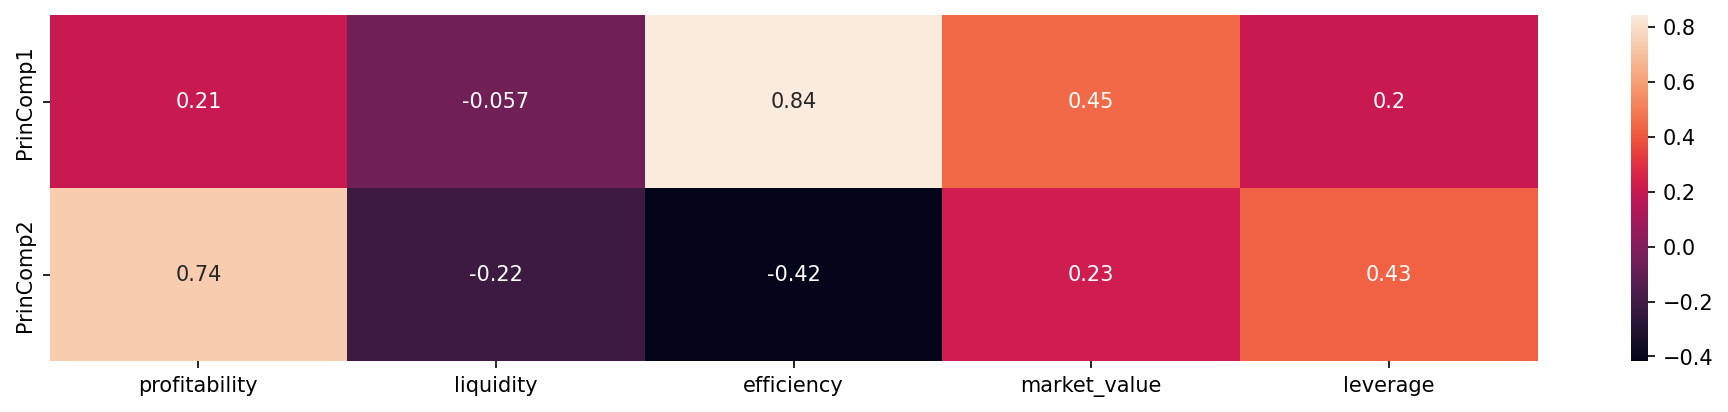

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,3), dpi=150)
sns.heatmap(df_components, annot=True)

<Axes: xlabel='prin_comp_1', ylabel='prin_comp_2'>

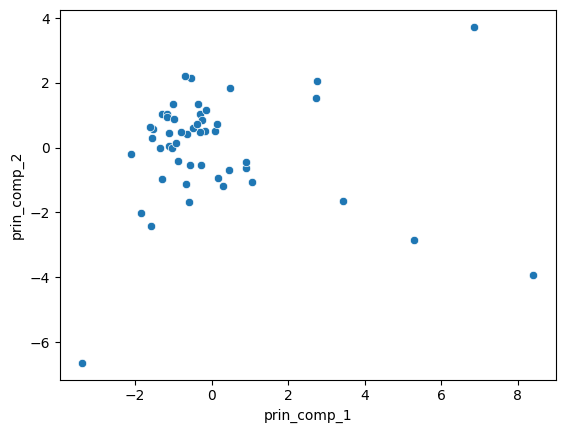

In [185]:
df_PCA = pd.DataFrame(projectedData, columns=['prin_comp_1','prin_comp_2'])
sns.scatterplot(data=df_PCA, x='prin_comp_1', y='prin_comp_2')

In [196]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5, random_state=42)
cluster_labels = model.fit_predict(df_PCA)
df_PCA['cluster'] = cluster_labels

# Apply cluster labels to df_results
df_results['cluster'] = cluster_labels

<Axes: xlabel='prin_comp_1', ylabel='prin_comp_2'>

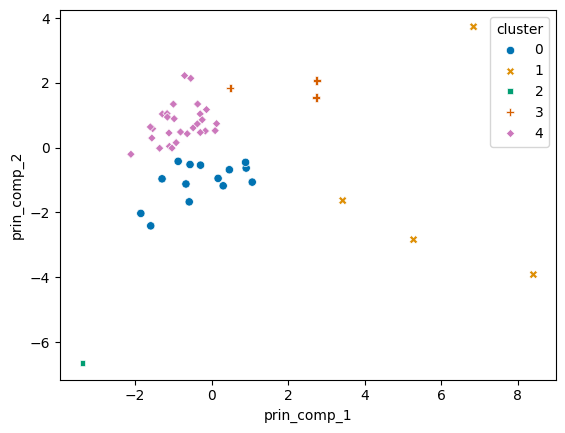

In [193]:
sns.scatterplot(data=df_PCA, x='prin_comp_1', y='prin_comp_2', style = 'cluster', hue = 'cluster', palette='colorblind')

In [ ]:
df_encoded = pd.get_dummies(df_results, drop_first=True)

# Strategy 2: ########################################################
# Temporarily replace any na values with the mean value for that column
df_encoded = df_encoded.select_dtypes(include = np.number).fillna(df_encoded.mean())
# Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=np.number).columns

# Replace missing values in only the numeric columns with their mean
df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].mean())

# df_temp = df_results.select_dtypes(include = np.number)
# df_temp = df_temp.fillna(df_temp.mean())
pca_columns = list(df_results.columns[0:15]) + [col for col in df_encoded.columns if col.startswith("Industry_")]

# Standardize the data
scaler = RobustScaler()
scaled_X = scaler.fit_transform(df_encoded[pca_columns])
scaled_X = df_encoded[pca_columns]

# Apply PCA
model_pca = PCA(n_components=2)
projectedData = model_pca.fit_transform(scaled_X)

print("PCA projected data shape:", projectedData.shape)

In [ ]:
# Base portfolio: Randomly pick 1 stock from each cluster
base_portfolio = df_results.groupby('cluster').apply(lambda x: x.sample(1)).reset_index(drop=True)
base_portfolio

/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_37222/841069264.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  base_portfolio = df_results.groupby('cluster').apply(lambda x: x.sample(1)).reset_index(drop=True)


,net_profit_margin,gross_profit_margin,roa,roe,current_ratio,quick_ratio,cash_ratio,inventory_turnover,accounts_receivable_turnover,asset_turnover,pe_ratio,pb_ratio,dividend_yield,debt_to_equity,debt_ratio,interest_coverage_ratio,ticker,elapsed,Industry,profitability,liquidity,efficiency,market_value,leverage,cluster
0,0.126845,0.198069,0.087641,0.208183,1.322732,0.995222,0.216499,6.337229,4.545891,0.690931,13.951890,2.734673,-0.023854,1.317450,0.554622,11.500994,SLB,13.070878,Oilfield Services,-0.564452,-0.073648,-0.041887,-0.000499,-0.514972,0
1,0.154116,0.346898,0.118147,0.530163,1.351906,0.874914,0.200933,2.667702,3.655592,0.766610,17.026839,8.398992,-0.015654,3.486868,0.777047,26.538160,CAT,9.828759,Heavy Equipment,0.267923,-0.177925,-0.084067,0.551804,0.660038,1
2,0.253062,0.441311,0.275098,1.560760,0.988012,0.944442,0.206217,37.977654,13.287284,1.087077,39.210440,58.100474,-0.004161,4.673462,0.823741,29.062039,AAPL,3.249652,Consumer Electronics,2.314686,-0.381638,1.969910,2.267826,0.948349,2
3,0.025969,0.122597,0.091196,0.251097,1.068368,0.572552,0.407944,12.303143,107.065842,3.511755,72.879237,18.281206,-0.002731,1.753372,0.636809,54.043750,COST,8.134752,Retail,-1.071262,-0.240782,9.784924,1.825336,0.739376,3
4,-0.697957,0.305153,-0.255834,-0.340263,3.424544,3.357546,0.964179,8.154648,5.932367,0.366547,-2.723439,0.935160,NaN,0.330013,0.248128,-102.736842,MRNA,5.033655,Biotechnology,-5.581010,4.786912,-0.407166,-0.320984,-4.125102,4


In [229]:
list(df_results["ticker"])

['AAPL',
 'MRNA',
 'NVDA',
 'ABBV',
 'PFE',
 'UNH',
 'MSFT',
 'JNJ',
 'INTC',
 'IBM',
 'BAC',
 'GS',
 'JPM',
 'C',
 'WFC',
 'MCD',
 'HD',
 'TSLA',
 'AMZN',
 'NKE',
 'KO',
 'COST',
 'PEP',
 'PG',
 'WMT',
 'CVX',
 'XOM',
 'SLB',
 'CAT',
 'EOG',
 'BA',
 'OXY',
 'DE',
 'HON',
 'DUK',
 'DOW',
 'SO',
 'FCX',
 'AEP',
 'EXC',
 'LIN',
 'NEM',
 'DIS',
 'NFLX',
 'T',
 'VZ',
 'O',
 'SPG',
 'PLD',
 'AMT']

In [231]:
import okama as ok

tickers = list(df_results["ticker"])
tickers_with_ext = [f"{ticker}.US" for ticker in tickers]

assets = tickers_with_ext
weights = [1/len(tickers)] * len(tickers)

pf = ok.Portfolio(
    assets=assets,
    weights=weights,    
    ccy='USD',
    rebalancing_period='month',  # 'Q' for quarterly, 'A' for annual, etc.
    first_date='2021-12',    # pick a reasonable start date (earliest is 2003-09 from initial assessment)
    last_date='2024-12'       # pick an end date to evaluate
)

In [ ]:
# Vectorized approach: compute percentage change directly
monthly_returns = pf.assets_close_monthly["AAPL.US"].pct_change()

# Drop the first NaN or any other missing values
monthly_returns = monthly_returns.dropna()

# Calculate the mean monthly return
mean_monthly_return = monthly_returns.mean()
std_monthly_return = monthly_returns.std()


print("Mean monthly return for AAPL: ", round(mean_monthly_return * 100, 2), "%", sep = "")
print("Mean monthly standard deviation for AAPL: ", round(std_monthly_return * 100, 2), "%", sep = "")

In [ ]:
from tqdm import tqdm
import numpy as np

# Monthly
mean_rets = []
std_rets = []

# for asset in tqdm(pf.assets_close_monthly):
for asset in tqdm(assets):
    hist = pf.assets_close_monthly[asset]

    monthly_returns = hist.pct_change()

    # Drop the first NaN or any other missing values
    monthly_returns = monthly_returns.dropna()

    # Calculate the mean monthly return
    mean_monthly_return = monthly_returns.mean()
    std_monthly_return = monthly_returns.std()

    mean_rets.append(mean_monthly_return)
    std_rets.append(std_monthly_return)

  0%|          | 0/50 [00:15<?, ?it/s]


KeyboardInterrupt: 

In [216]:
monthly_returns = []

for i in range(1, len(pf.assets_close_monthly["AAPL.US"])):
    monthly_returns.append((pf.assets_close_monthly["AAPL.US"][i] - pf.assets_close_monthly["AAPL.US"][i - 1]) / pf.assets_close_monthly["AAPL.US"][i - 1])

print(np.mean(monthly_returns))

/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_37222/2661371738.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_returns.append((pf.assets_close_monthly["AAPL.US"][i] - pf.assets_close_monthly["AAPL.US"][i - 1]) / pf.assets_close_monthly["AAPL.US"][i - 1])
/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_37222/2661371738.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_returns.append((pf.assets_close_monthly["AAPL.US"][i] - pf.assets_close_monthly["AAPL.US"][i - 1]) / pf.assets_close_monthly["AAPL.US"][i - 1])
/var/folders/rs/dqcm8rm967g9vzgwrpdplf080000gn/T/ipykernel_37222

KeyboardInterrupt: 

In [198]:
base_portfolio["ticker"]

0     SLB
1     CAT
2    AAPL
3    COST
4    MRNA
Name: ticker, dtype: object

In [201]:
# Set asset allocation
assets = base_portfolio["ticker"].tolist()
assets = [ticker + ".US" for ticker in assets]
# assets = ['T.US', 'XOM.US', 'FRE.XFRA', 'SNW.XFRA', 'LKOH.MOEX']
weights = [0.2, 0.2, 0.2, 0.2, 0.2]  # Must sum to 1.0

pf = ok.Portfolio(
    assets=assets,
    weights=weights,    
    ccy='USD',
    rebalancing_period='month',  # 'Q' for quarterly, 'A' for annual, etc.
    first_date='2018-12',    # pick a reasonable start date (earliest is 2003-09 from initial assessment)
    last_date='2024-12'       # pick an end date to evaluate
)

## Evaluate Portfolio

### Basic

In [203]:
def extract_return(wealth_index, start_date, end_date):
    return wealth_index.loc[end_date, wealth_index.columns[0]] / wealth_index.loc[start_date, wealth_index.columns[0]] - 1

start_date = "2019-01"
end_date = "2024-12"

ret = extract_return(pf.wealth_index, start_date, end_date)

print(f"Start date: {start_date}")
print(f"End date: {end_date}")
# print(f"Years: {end_date - start_date}")
print(f"Return: {ret * 100:.2f}%")
# Annualized return

Start date: 2019-01
End date: 2024-12
Return: 424.57%


### Scenario Analysis
- Boom
- Bust
- Flat

Note: Historical analysis here would require data throughout these years. 

In [ ]:
# Bust: 2001-2001 (start -> end)
#       2007-2009
#       2020-2020 (start -> end)

# Boom: 2009-2019
#       2020-2024 (end -> end)

### Comparison

### Simulation

In [15]:
import numpy as np
from scipy import stats

# Decide on strategy

# TODO: Build profitability, liquidity, efficiency, market value, and leverage equations
stock = df_results[df_results["ticker"] == "AAPL"]

# TODO: Change this to use z-score instead of actual values. Default to 0
profitability = df_results["net_profit_margin"] + df_results["gross_profit_margin"] + df_results["roa"] + df_results["roe"]
liquidity = df_results["current_ratio"] + df_results["quick_ratio"] + df_results["cash_ratio"]
efficiency = df_results["inventory_turnover"] + df_results["receivables"] + df_results["asset_turnover"]
market_value = df_results["pe_ratio"] + df_results["pb_ratio"] + df_results["dividend_yield"]
leverage = df_results["debt_to_equity"] + df_results["debt_ratio"] + df_results["interest_coverage_ratio"]

industry = 3 # Entertainment



# We'll do these independent of stock diversification model
alpha = 1
beta = -1
# Historical and financial data to determine



# TODO: Build risk / return modeler
return_vs_risk = 0

# alpha = return = historical returns + (ratio estimator <- model this <- perhaps on parameter for investment quality equations)
# beta = risk = historical risk + (inv quality -> beta model)

# TODO: Build portfolio optimization model
riskfactor = 3

# TODO: PCA for investment difference maximization



KeyError: 'receivables'